In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/7k-books-with-metadata/books.csv
/kaggle/input/cover-not-found/cover-not-found.jpg


In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
path = "/kaggle/input/7k-books-with-metadata/books.csv"
books = pd.read_csv(path)
books.head(10)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0
6,9780006353287,0006353282,An Autobiography,NaN,Agatha Christie,"Authors, English",http://books.google.com/books/content?id=c49GQ...,Donation.,1977.0,4.27,560.0,3975.0
7,9780006380832,0006380832,Empires of the Monsoon,A History of the Indian Ocean and Its Invaders,Richard Hall,"Africa, East",http://books.google.com/books/content?id=MuPEQ...,Until Vasco da Gama discovered the sea-route t...,1998.0,4.41,608.0,65.0
8,9780006470229,000647022X,The Gap Into Madness,Chaos and Order,Stephen R. Donaldson,"Hyland, Morn (Fictitious character)",http://books.google.com/books/content?id=4oXav...,A new-cover reissue of the fourth book in the ...,1994.0,4.15,743.0,103.0
9,9780006472612,0006472613,Master of the Game,NaN,Sidney Sheldon,Adventure stories,http://books.google.com/books/content?id=TkTYp...,Kate Blackwell is an enigma and one of the mos...,1982.0,4.11,489.0,43540.0


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
books.isna()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6805,False,False,False,False,False,False,False,False,False,False,False,False
6806,False,False,False,True,False,False,False,True,False,False,False,False
6807,False,False,False,True,False,False,True,True,False,False,False,False
6808,False,False,False,True,False,False,False,False,False,False,False,False


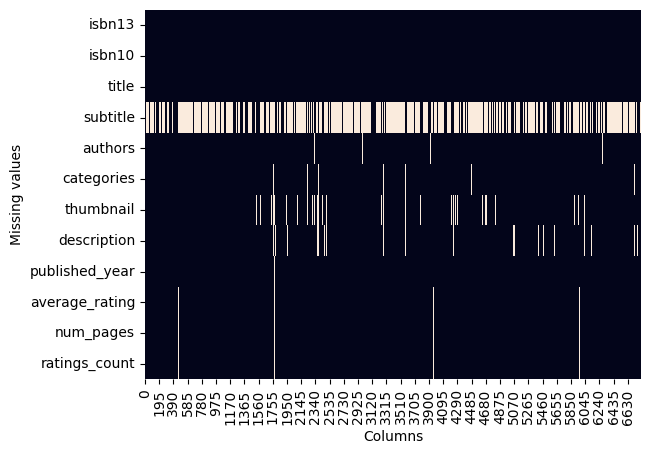

In [6]:
ax = plt.axes()
sns.heatmap(books.isna().transpose(), cbar=False, ax=ax)

plt.xlabel("Columns")
plt.ylabel("Missing values")

plt.show()

In [7]:
import numpy as np

In [8]:
books["missing_description"] = np.where(books["description"].isna(),1,0)
books["age"] = 2025 - books["published_year"]

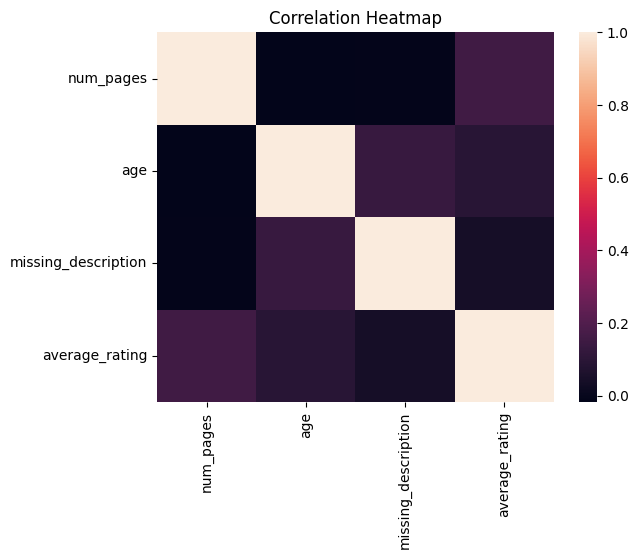

In [9]:
colums_of_interested = ["num_pages","age","missing_description","average_rating"]

correlation_matrix = books[colums_of_interested].corr(method="spearman")

heatmap = sns.heatmap(correlation_matrix)
heatmap.set_title("Correlation Heatmap")
plt.show()

non-correlation between them!

In [10]:
books_missing = books[~(books['description'].isna()) &
    ~(books['num_pages'].isna()) & 
    ~(books['average_rating'].isna()) &
    ~(books['published_year'].isna())
]
books_missing

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,0,44.0


In [11]:
books_missing['categories'].value_counts()

categories
Fiction                      2523
Juvenile Fiction              534
Biography & Autobiography     391
History                       258
Literary Criticism            164
                             ... 
English essays                  1
Inventions                      1
Building laws                   1
LITERARY CRITICISM              1
Amish                           1
Name: count, Length: 531, dtype: int64

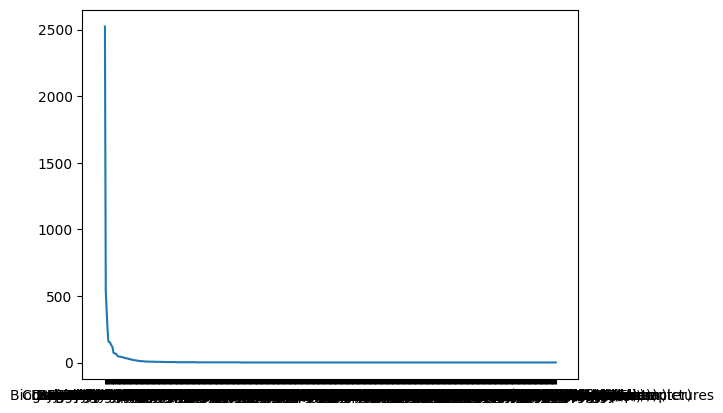

In [12]:
plt.plot(books_missing['categories'].value_counts())

<Axes: >

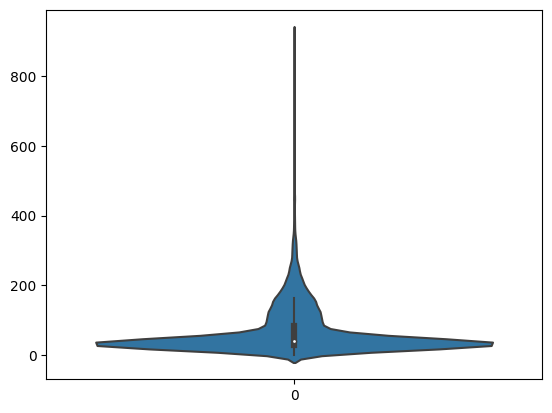

In [13]:
books_missing['len'] = books_missing['description'].str.split().str.len()
sns.violinplot(books_missing['len'])

In [14]:
books_missing.loc[books_missing['len'].between(25,30)]['description']

9       Kate Blackwell is an enigma and one of the mos...
14      Available in the U.S. for the first time, this...
21      Reissue of the author's most famous and well-l...
46      No one believes a little girl when she insists...
71      It should be the most natural thing in the wor...
                              ...                        
6751    The latest collection from the literary journa...
6755    "My Dirty Thirties" takes female empowerment t...
6760    Joel, an English teacher, has never really lik...
6766    Discusses the historical and intellectual back...
6779    Edited by the creator and executive producer o...
Name: description, Length: 704, dtype: object

In [15]:
books_missing_info = books_missing[books_missing['len'] >= 25]
books_missing_info

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age,len
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,22.0,288
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0,63
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0,117
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0,174


In [16]:
books_missing_info['title_and_sub'] = np.where(books_missing_info['subtitle'].isna(),
                                               books_missing_info['title'],
                                               books_missing_info['title'] + ": " + books_missing_info['subtitle']
                                              )

In [17]:
books_missing_info['tagged_description'] = books_missing_info['isbn13'].astype(str) + ' ' + books_missing_info['description'].astype(str)
books_missing_info['tagged_description']

0       9780002005883 A NOVEL THAT READERS and critics...
1       9780002261982 A new 'Christie for Christmas' -...
3       9780006178736 A memorable, mesmerizing heroine...
4       9780006280897 Lewis' work on the nature of lov...
5       9780006280934 "In The Problem of Pain, C.S. Le...
                              ...                        
6802    9788172235222 On A Train Journey Home To North...
6803    9788173031014 This book tells the tale of a ma...
6804    9788179921623 Wisdom to Create a Life of Passi...
6805    9788185300535 This collection of the timeless ...
6808    9789027712059 Since the three volume edition o...
Name: tagged_description, Length: 5197, dtype: object

In [18]:
!pip install langchain_community
!pip install langchain_text_splitters
!pip install langchain_chroma

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 40.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.5/438.5 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 25.0
    Uninstalling packaging-25.0:
      Successfully uninstalled packaging-25.0
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.50
    Uninstalling langchain-core-0.3.50:
      Successfully uninstalled langchain-core-0.3.50
  Attempting uninstall: langchain-text-splitters
    Found existing installation: langchain-text-splitters 0.3.7
    Uninstalling langchain-text-splitters-0.3.7:
      Successfully uninstalled langchain-text-splitters-0.3.7
  Attempting uninstall: lang

In [19]:
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import CharacterTextSplitter
from langchain_chroma import Chroma

In [20]:
books_missing_info['tagged_description'].to_csv('tagged_description.txt',sep='\n',index=False,header=False)

In [21]:
raw_document = TextLoader('tagged_description.txt').load()
text_splitter = CharacterTextSplitter(chunk_size=0,chunk_overlap=0,separator='\n')
document = text_splitter.split_documents(raw_document)

In [22]:
document

[Document(metadata={'source': 'tagged_description.txt'}, page_content='9780002005883 A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, G

In [23]:
!pip install 

ERROR: You must give at least one requirement to install (see "pip help install")


In [24]:
from langchain.embeddings import HuggingFaceEmbeddings

In [25]:
huggingface_embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

db_books = Chroma.from_documents(
    document,
    embedding=huggingface_embeddings
)

/tmp/ipykernel_35/2472580913.py:1: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  huggingface_embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
2025-06-01 18:57:50.015846: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748804270.201135      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748804270.253680      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Att

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [26]:
query = "A book about vietnam war"
docs = db_books.similarity_search(query, k=3)
docs

[Document(id='ba9785e7-2db0-41c9-a963-2526764da0ca', metadata={'source': 'tagged_description.txt'}, page_content="9780007162994 Perhaps the best book to emerge from the Vietnam War -- reissued alongside five other jewels of the Flamingo backlist from the 1970s. First published in1973, this intensely personal novel about one foot soldier's tour of duty in Vietnam established Tim O'Brien's reputation as the outstanding chronicler of the Vietnam experience for a generation of Americans. From basic training to the front line and back again, he takes the reader on an unforgettable journey -- walking the minefields of My Lai, fighting the heat and the snipers in an alien land, crawling into the ghostly tunnels -- as he explores the ambiguities of manhood and morality in a war no one believes in."),
 Document(id='9c9e2abb-6156-4201-bebf-827dfeeee81e', metadata={'source': 'tagged_description.txt'}, page_content='9780679760238 The author recalls his experiences during the Vietnam war, reminisci

In [27]:
books_missing_info[books_missing_info['isbn13'] == int(docs[0].page_content.split()[0].strip())]

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age,len,title_and_sub,tagged_description
79,9780007162994,0007162995,If I Die in a Combat Zone,NaN,Tim O'Brien,"Vietnam War, 1961-1975",http://books.google.com/books/content?id=0qUtS...,Perhaps the best book to emerge from the Vietn...,2003.0,3.95,208.0,11.0,0,22.0,113,If I Die in a Combat Zone,9780007162994 Perhaps the best book to emerge ...


In [28]:
def retrieve_recommendations(query, top_k=10):
    docs = db_books.similarity_search(query, k=top_k)

    rec = []
    for i in range(top_k):
        rec += [int(docs[i].page_content.split()[0].strip('"'))]
        
    return books_missing_info[books_missing_info['isbn13'].isin(rec)].head(top_k)

In [29]:
retrieve_recommendations('Anime',5)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age,len,title_and_sub,tagged_description
1902,9780345477972,0345477979,Tsubasa,vol. 7,CLAMP (Mangaka group),Juvenile Fiction,http://books.google.com/books/content?id=kuh6t...,"Sakura, the princess of Clow, has a strange po...",2005.0,4.29,194.0,3392.0,0,20.0,36,Tsubasa: vol. 7,"9780345477972 Sakura, the princess of Clow, ha..."
1922,9780345485281,0345485289,"Tsubasa, 11",Reservoir Chronicle (YA),CLAMP (Mangaka group),Amnesia,NaN,"Sakura, the princess of Clow, has a strange po...",2004.0,4.28,183.0,2674.0,0,21.0,36,"Tsubasa, 11: Reservoir Chronicle (YA)","9780345485281 Sakura, the princess of Clow, ha..."
5931,9781421502793,1421502798,Maison Ikkoku,NaN,Rumiko Takahashi,Comics & Graphic Novels,http://books.google.com/books/content?id=-CpgQ...,From the creator of RANMA 1/2 and INUYASHA com...,2006.0,4.35,208.0,251.0,0,19.0,96,Maison Ikkoku,9781421502793 From the creator of RANMA 1/2 an...
6141,9781569709078,1569709076,Little Butterfly,NaN,Hinako Takanaga;Sachiko Sato,Comics & Graphic Novels,http://books.google.com/books/content?id=SzzyP...,"Despite being as different as boys can be, out...",2006.0,4.07,184.0,1522.0,0,19.0,30,Little Butterfly,9781569709078 Despite being as different as bo...
6793,9784766113389,4766113381,How to Draw Manga,Girls' Life Illustration File,Kazuko Tadano,Art,http://books.google.com/books/content?id=N3s3G...,This volume was inspired by young women workin...,2003.0,4.14,132.0,65.0,0,22.0,53,How to Draw Manga: Girls' Life Illustration File,9784766113389 This volume was inspired by youn...


In [30]:
books_missing_info['categories'].value_counts()

categories
Fiction                       2111
Juvenile Fiction               390
Biography & Autobiography      311
History                        207
Literary Criticism             124
                              ... 
Human-animal relationships       1
Imperialism                      1
Aged women                       1
Humorous stories                 1
Butlers                          1
Name: count, Length: 479, dtype: int64

In [31]:
category_mapping = {'Fiction' : "Fiction",
'Juvenile Fiction': "Children's Fiction",
'Biography & Autobiography': "Nonfiction",
'History': "Nonfiction",
'Literary Criticism': "Nonfiction",
'Philosophy': "Nonfiction",
'Religion': "Nonfiction",
'Comics & Graphic Novels': "Fiction",
'Drama': "Fiction",
'Juvenile Nonfiction': "Children's Nonfiction",
'Science': "Nonfiction",
'Poetry': "Fiction"}

books_missing_info['new_categories'] = books_missing_info['categories'].map(category_mapping)

In [32]:
from transformers import pipeline

fiction_categories = ["Fiction", "Nonfiction"]

pipe = pipeline("zero-shot-classification",
                model="facebook/bart-large-mnli")

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


In [33]:
seq = books_missing_info.loc[books_missing_info['new_categories'] == 'Fiction','description'].reset_index(drop=True)[0]

In [34]:
pipe(seq, fiction_categories)

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

In [35]:
import numpy as np

max_idx = np.argmax(pipe(seq,fiction_categories)['scores'])
max_label = pipe(seq,fiction_categories)['labels'][max_idx]

max_label

'Fiction'

In [36]:
def prediction(seq,categories):
    pred = pipe(seq,categories)
    max_idx = np.argmax(pred['scores'])
    max_label = pred['labels'][max_idx] 

    return max_label

In [37]:
from tqdm import tqdm

real = []
pred = []

for i in tqdm(range(len(books_missing_info))):
    seq = books_missing_info['description'].reset_index(drop=True)[i]
    real += [books_missing_info.iloc[i]['new_categories']]
    pred += [prediction(seq,fiction_categories)]





100%|██████████| 5197/5197 [04:58<00:00, 17.44it/s]


In [38]:
pred_df = pd.DataFrame({'real_categories':real,'predictions':pred})
pred_df.head(10)

,real_categories,predictions
0,Fiction,Fiction
1,NaN,Fiction
2,Fiction,Fiction
3,NaN,Nonfiction
4,NaN,Nonfiction
5,NaN,Nonfiction
6,NaN,Fiction
7,NaN,Nonfiction
8,Fiction,Fiction
9,NaN,Fiction


In [39]:
mask_match = pred_df['real_categories'] == pred_df['predictions']
mask_missing = pred_df['real_categories'].isna()

pred_df['check'] = np.where(mask_match | mask_missing, 1, 0)

pred_df['check'].sum() / len(pred_df)

0.7452376370983259

In [40]:
pred_df['real_categories'].value_counts()

real_categories
Fiction                  2364
Nonfiction                932
Children's Fiction        390
Children's Nonfiction      57
Name: count, dtype: int64

In [63]:
books_missing_info["new_categories"] = np.where(books_missing_info["new_categories"].isna(), pred_df["predictions"], books_missing_info["new_categories"])
books_missing_info

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age,len,title_and_sub,tagged_description,new_categories
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199,Gilead,9780002005883 A NOVEL THAT READERS and critics...,Fiction
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...,Fiction
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57,Rage of angels,"9780006178736 A memorable, mesmerizing heroine...",Fiction
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45,The Four Loves,9780006280897 Lewis' work on the nature of lov...,Nonfiction
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le...",Nonfiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,22.0,288,Mistaken Identity,9788172235222 On A Train Journey Home To North...,Fiction
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0,63,Journey to the East,9788173031014 This book tells the tale of a ma...,Nonfiction
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0,117,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...,Fiction
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0,174,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...,Nonfiction


In [64]:
books_missing_info.to_csv('books.csv',index=False)

In [65]:
books = pd.read_csv('/kaggle/working/books.csv')

In [66]:
classifier = pipeline("text-classification",
                      model="j-hartmann/emotion-english-distilroberta-base",
                      top_k = None)
classifier("why do birds fly ?")

Device set to use cuda:0


[[{'label': 'neutral', 'score': 0.44213923811912537},
  {'label': 'surprise', 'score': 0.4039667844772339},
  {'label': 'anger', 'score': 0.07448547333478928},
  {'label': 'fear', 'score': 0.04303832724690437},
  {'label': 'disgust', 'score': 0.016971733421087265},
  {'label': 'sadness', 'score': 0.016615793108940125},
  {'label': 'joy', 'score': 0.0027827098965644836}]]

In [67]:
classifier('what are we people living for?')

[[{'label': 'neutral', 'score': 0.8664526343345642},
  {'label': 'surprise', 'score': 0.06327503174543381},
  {'label': 'anger', 'score': 0.03499443084001541},
  {'label': 'disgust', 'score': 0.020892268046736717},
  {'label': 'fear', 'score': 0.007620322983711958},
  {'label': 'sadness', 'score': 0.005360832903534174},
  {'label': 'joy', 'score': 0.0014044203562662005}]]

In [68]:
import numpy as np

emotion_labels = ["anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]
isbn = []
emotion_scores = {label: [] for label in emotion_labels}


def cal_max_emotion(predictions):
    per_emotion_scores = {label: [] for label in emotion_labels}
    for pred in predictions:
        sort_pred = sorted(pred,key=lambda x: x["label"])
        for index, label in enumerate(emotion_scores):
            per_emotion_scores[label].append(sort_pred[index]['score'])
    return {label: np.max(scores) for label, scores in per_emotion_scores.items()}

In [69]:
for i in range(5):
    isbn.append(books["isbn13"][i])
    sentences = books["description"][i].split(".")
    predictions = classifier(sentences)
    max_score = cal_max_emotion(predictions)
    for label in emotion_labels:
        emotion_scores[label].append(max_score[label])
        

In [70]:
emotion_scores

{'anger': [0.06413362920284271,
  0.6126190423965454,
  0.06413362920284271,
  0.3514833450317383,
  0.08141232281923294],
 'disgust': [0.27359142899513245,
  0.348285049200058,
  0.10400665551424026,
  0.15072239935398102,
  0.18449512124061584],
 'fear': [0.9281684160232544,
  0.942527711391449,
  0.9723208546638489,
  0.36070701479911804,
  0.09504342824220657],
 'joy': [0.9327976107597351,
  0.70442134141922,
  0.7672373056411743,
  0.2518812119960785,
  0.0405644029378891],
 'sadness': [0.6462159156799316,
  0.887939453125,
  0.5494768619537354,
  0.7326857447624207,
  0.8843895196914673],
 'surprise': [0.9671574234962463,
  0.11169018596410751,
  0.11169018596410751,
  0.11169018596410751,
  0.47588059306144714],
 'neutral': [0.729602575302124,
  0.2525453269481659,
  0.07876549661159515,
  0.07876549661159515,
  0.07876549661159515]}

In [71]:
from tqdm import tqdm

emotion_labels = ["anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]
isbn = []
emotion_scores = {label: [] for label in emotion_labels}

for i in tqdm(range(len(books))):
    isbn.append(books["isbn13"][i])
    sentences = books["description"][i].split(".")
    predictions = classifier(sentences)
    max_scores = cal_max_emotion(predictions)
    for label in emotion_labels:
        emotion_scores[label].append(max_scores[label])

100%|██████████| 5197/5197 [01:54<00:00, 45.29it/s]


In [72]:
emotions_df = pd.DataFrame(emotion_scores)
emotions_df["isbn13"] = isbn

books = pd.merge(books, emotions_df, on = "isbn13")

books

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,...,title_and_sub,tagged_description,new_categories,anger,disgust,fear,joy,sadness,surprise,neutral
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,...,Gilead,9780002005883 A NOVEL THAT READERS and critics...,Fiction,0.064134,0.273591,0.928168,0.932798,0.646216,0.967157,0.729603
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,...,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...,Fiction,0.612619,0.348285,0.942528,0.704421,0.887939,0.111690,0.252545
2,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,...,Rage of angels,"9780006178736 A memorable, mesmerizing heroine...",Fiction,0.064134,0.104007,0.972321,0.767237,0.549477,0.111690,0.078765
3,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,...,The Four Loves,9780006280897 Lewis' work on the nature of lov...,Nonfiction,0.351483,0.150722,0.360707,0.251881,0.732686,0.111690,0.078765
4,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,...,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le...",Nonfiction,0.081412,0.184495,0.095043,0.040564,0.884390,0.475881,0.078765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,...,Mistaken Identity,9788172235222 On A Train Journey Home To North...,Fiction,0.148208,0.030643,0.919165,0.255170,0.853721,0.980877,0.030656
5193,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,...,Journey to the East,9788173031014 This book tells the tale of a ma...,Nonfiction,0.064134,0.114383,0.051363,0.400263,0.883198,0.111690,0.227765
5194,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,...,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...,Fiction,0.009997,0.009929,0.339218,0.947779,0.375755,0.066685,0.057625
5195,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,...,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...,Nonfiction,0.064134,0.104007,0.459270,0.759456,0.951104,0.368111,0.078765


In [73]:
books.to_csv("books_with_emotions.csv", index = False)

In [83]:
import shutil
import os

# Tạo thư mục đích trong /kaggle/working/
dest_dir = "/kaggle/working"
os.makedirs(dest_dir, exist_ok=True)

# Copy ảnh từ folder khác
shutil.copy(
    "/kaggle/input/cover-not-found/cover-not-found.jpg",
    dest_dir  # hoặc f"{dest_dir}/cover-not-found.jpg"
)

'/kaggle/working/cover-not-found.jpg'

In [84]:
books["large_thumbnail"] = books["thumbnail"] + "&fife=w800"
books["large_thumbnail"] = np.where(
    books["large_thumbnail"].isna(),
    "/kaggle/working/cover-not-found.jpg",
    books["large_thumbnail"],
)

In [85]:
!pip install gradio

In [86]:
import gradio as gr
def retrieve_semantic_recommendations(
        query: str,
        category: str = None,
        tone: str = None,
        initial_top_k: int = 50,
        final_top_k: int = 16,
) -> pd.DataFrame:

    recs = db_books.similarity_search(query, k=initial_top_k)
    books_list = [int(rec.page_content.strip('"').split()[0]) for rec in recs]
    book_recs = books[books["isbn13"].isin(books_list)].head(initial_top_k)

    if category != "All":
        book_recs = book_recs[book_recs["new_categories"] == category].head(final_top_k)
    else:
        book_recs = book_recs.head(final_top_k)

    if tone == "Happy":
        book_recs.sort_values(by="joy", ascending=False, inplace=True)
    elif tone == "Surprising":
        book_recs.sort_values(by="surprise", ascending=False, inplace=True)
    elif tone == "Angry":
        book_recs.sort_values(by="anger", ascending=False, inplace=True)
    elif tone == "Suspenseful":
        book_recs.sort_values(by="fear", ascending=False, inplace=True)
    elif tone == "Sad":
        book_recs.sort_values(by="sadness", ascending=False, inplace=True)

    return book_recs


def recommend_books(
        query: str,
        category: str,
        tone: str
):
    recommendations = retrieve_semantic_recommendations(query, category, tone)
    results = []

    for _, row in recommendations.iterrows():
        description = row["description"]
        truncated_desc_split = description.split()
        truncated_description = " ".join(truncated_desc_split[:30]) + "..."

        authors_split = row["authors"].split(";")
        if len(authors_split) == 2:
            authors_str = f"{authors_split[0]} and {authors_split[1]}"
        elif len(authors_split) > 2:
            authors_str = f"{', '.join(authors_split[:-1])}, and {authors_split[-1]}"
        else:
            authors_str = row["authors"]

        caption = f"{row['title']} by {authors_str}: {truncated_description}"
        results.append((row["large_thumbnail"], caption))
    return results


In [87]:

categories = ["All"] + sorted(books["new_categories"].unique())
tones = ["All"] + ["Happy", "Surprising", "Angry", "Suspenseful", "Sad"]

with gr.Blocks(theme = gr.themes.Glass()) as dashboard:
    gr.Markdown("# Semantic book recommender")

    with gr.Row():
        user_query = gr.Textbox(label = "Please enter a description of a book:",
                                placeholder = "e.g., A story about forgiveness")
        category_dropdown = gr.Dropdown(choices = categories, label = "Select a category:", value = "All")
        tone_dropdown = gr.Dropdown(choices = tones, label = "Select an emotional tone:", value = "All")
        submit_button = gr.Button("Find recommendations")

    gr.Markdown("## Recommendations")
    output = gr.Gallery(label = "Recommended books", columns = 8, rows = 2)

    submit_button.click(fn = recommend_books,
                        inputs = [user_query, category_dropdown, tone_dropdown],
                        outputs = output)


if __name__ == "__main__":
    dashboard.launch()

* Running on local URL:  http://127.0.0.1:7862
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://3ca9b664dd59dbd9a3.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
